In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_breast_cancer
df2 = load_breast_cancer()

### Exercício 2

In [16]:
df_steel = pd.read_csv('faults.csv')

In [17]:
df_steel.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [18]:
targets = df_steel.iloc[:, 27:]
df_steel.drop(targets.columns, axis=1, inplace=True) # this will drop the all the defects column
df_steel['Target'] = targets.idxmax(1) #this will add a 'Target' column to our dataset describing which record has a particular defect.
df_steel.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_steel.drop('Target', axis=1), df_steel['Target'], test_size = 0.2)

In [35]:
steps = [("std_scaler", StandardScaler()),("dtc", DecisionTreeClassifier())]

pipe = Pipeline(steps=steps)

spliter = StratifiedKFold(n_splits = 10, shuffle = True, random_state=42)

param_grid ={ 'dtc__criterion' : ['gini','entropy'],
             'dtc__splitter' : ["best", "random"],
             "dtc__max_depth" : range(3,11) 
}

grid_dtc = GridSearchCV(
                        estimator = pipe,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv = spliter,
                        verbose=0
)

grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': range(3, 11),
                         'dtc__splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
grid_dtc.best_params_

{'dtc__criterion': 'entropy', 'dtc__max_depth': 9, 'dtc__splitter': 'best'}

In [37]:
y_pred = grid_dtc.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.58      0.64      0.61        83
   Dirtiness       0.64      0.50      0.56        14
    K_Scatch       0.91      0.96      0.93        74
Other_Faults       0.63      0.55      0.59       125
      Pastry       0.56      0.72      0.63        32
      Stains       0.75      0.94      0.83        16
   Z_Scratch       0.95      0.78      0.85        45

    accuracy                           0.70       389
   macro avg       0.72      0.73      0.71       389
weighted avg       0.71      0.70      0.70       389



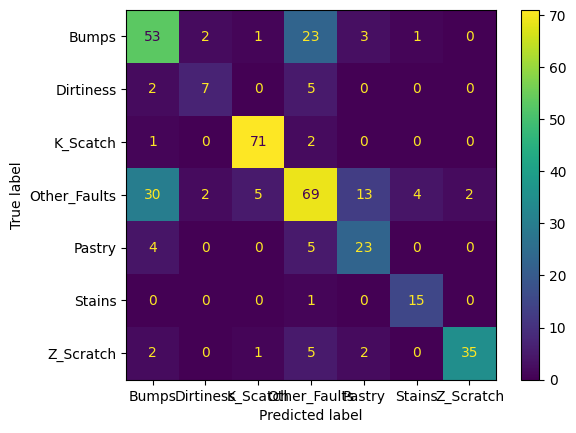

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [47]:
modelo = grid_dtc.best_estimator_["dtc"]
nome_variaveis = X_train.columns
nome_classes = y_train.unique().astype(str)

plt.figure(figsize=(50,50), dpi=500)

plot_tree(modelo, feature_names=nome_variaveis, class_names=modelo.classes_, filled=True)
plt.savefig("arvore.png")
plt.close()

### Exercício 3

Use o dataset house_prices, aplique o DecisionTreeRegressor. Realize uma otimização de hiperparâmetros da árvore utilizando Grid Search.

 - 1) Importe o dataset e faça o tratamento e seleção das variáveis;
 - 2) Faça o split dos dados em treino e teste;
 - 3) Instancie o modelo no pipeline;\
   - 3.1) Treine um modelo base para referência;
 - 4) Defina os hiperparâmetros para o Grid Search;
 - 5) Treine o modelo;
 - 6) Faça o Gráfico da árvore;

In [5]:
import numpy as np

In [2]:
houses = pd.read_csv('house_prices.csv')

In [11]:
house = houses.select_dtypes(include=np.number).dropna().drop('Id', axis=1)
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


Como os valores, além de variar bastante, estão em escalas bem distintas, deve ser aplicada um scaler às features, para só então aplicar o modelo.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(house.drop("SalePrice", axis=1), house["SalePrice"], test_size=0.2, random_state=42)

Treinando modelo base para referência e futura comparação se o modelo, após utilizar novos hiperparmetros, é de fato melhor.

In [80]:
# modelo base
dtr_base = DecisionTreeRegressor(random_state=42)
dtr_base.fit(X_train, y_train)
y_pred_base = dtr_base.predict(X_test)
print(r2_score(y_test, y_pred_base))

0.7736706827938187


Sem o random_state fixo o modelo variou de 0.74 a 0.77

In [88]:
dtr_base.get_depth()

21

In [14]:
dtr_base.get_depth()

21

In [24]:
X_train.shape

(896, 36)

In [92]:
steps_pipe = [("std_scaler", StandardScaler()) , ("dtr", DecisionTreeRegressor())]

pipe = Pipeline(steps= steps_pipe)

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

param_grid = {
              "dtr__criterion": ["squared_error","absolue_error","poisson"],
              "dtr__splitter" : ["best", "random"],
              "dtr__max_depth" : range(2,25)
              }

dtr_grid = GridSearchCV(estimator=pipe, 
                        param_grid = param_grid, 
                        scoring = "r2", 
                        cv = cv, 
                        verbose = 0)

dtr_grid.fit(X_train, y_train)

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
184 fits failed out of a total of 552.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
184 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ferna\

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dtr', DecisionTreeRegressor())]),
             param_grid={'dtr__criterion': ['squared_error', 'absolue_error',
                                            'poisson'],
                         'dtr__max_depth': range(2, 25),
                         'dtr__splitter': ['best', 'random']},
             scoring='r2')

In [93]:
dtr_grid.best_params_, dtr_grid.best_score_

({'dtr__criterion': 'poisson', 'dtr__max_depth': 6, 'dtr__splitter': 'random'},
 0.7611465450881947)

Sem o random_state fixo, o modelo variou de 0.73 a 0.77

In [94]:
y_pred = dtr_grid.predict(X_test)

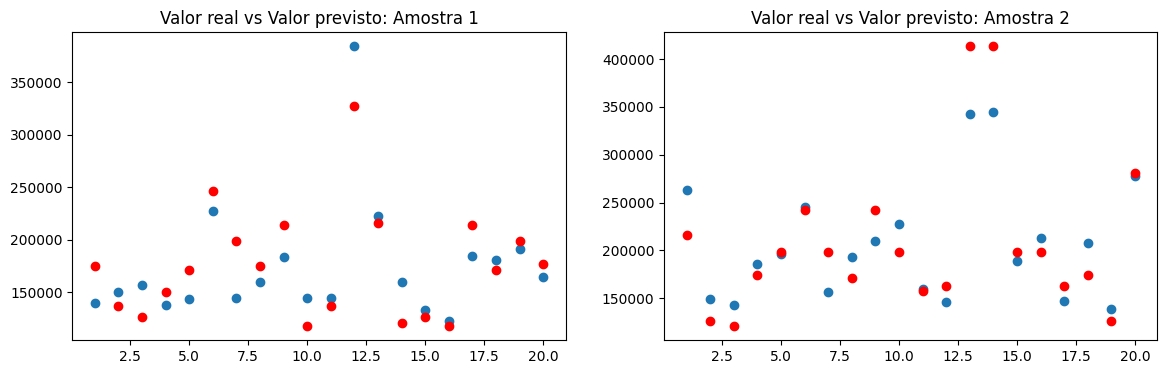

In [117]:
fig = plt.figure(figsize=(14,4))

plt.subplot(1, 2, 1)
plt.scatter(range(1,21), y_test[:20])
plt.scatter(range(1,21), y_pred[:20], c='red')
plt.title('Valor real vs Valor previsto: Amostra 1')

plt.subplot(1, 2, 2)
plt.scatter(range(1,21), y_test[80:100])
plt.scatter(range(1,21), y_pred[80:100], c='red')
plt.title('Valor real vs Valor previsto: Amostra 2')

plt.show()

Analisando a diferença entre o valor real e o valor predito pelo modelo:

In [108]:
y_dif = y_pred - y_test
y_dif.std()

48919.71631084585

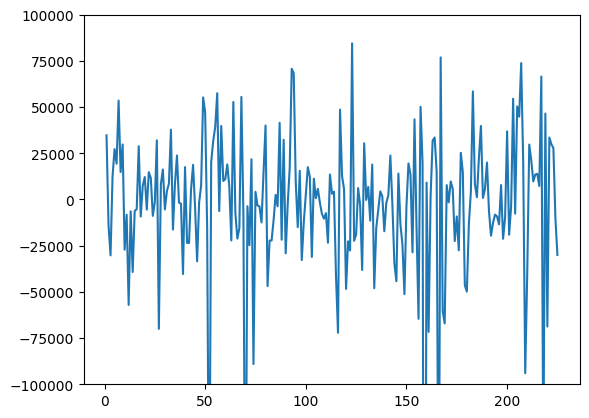

In [105]:
plt.plot(range(1,226), y_dif)
plt.ylim(-100000, 100000)

plt.show()

Algumas revisões que podem ser feitas para melhorar o modelo:
- remover outliers 
- rever features (se tem algumas que podem ser reptitivas e talvez nao interessantes para o modelo)